WELCOME.

This is a notebook showing EDA of united airlines data as part of an online Hackathon

In [ ]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import  plotly.graph_objects as go
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
plt.style.use('ggplot')

In [ ]:
# reading data

inventory_df = pd.read_csv('/content/drive/MyDrive/united airlines/Inflight Service_Inventory data.csv')
score_df = pd.read_csv("/content/drive/MyDrive/united airlines/score_final_1.csv")
comments_df = pd.read_csv("/content/drive/MyDrive/united airlines/Survey data _Customer comments.csv")
pre_order_df = pd.read_csv('/content/drive/MyDrive/united airlines/Inflight Service_Pre order data.csv')
scores_united_df = pd.read_csv('/content/drive/MyDrive/united airlines/united_score_final.csv')

In [ ]:
#  Printing shapes of different df. Scores_unitted_df has is a modification of score_df.
# Some prliminary cleaning has been done already in MS EXCEL
print(inventory_df.shape)
print(score_df.shape)
print(comments_df.shape)
print(pre_order_df.shape)
print(scores_united_df.shape)

(61267, 9)
(34963, 23)
(9424, 14)
(212039, 13)
(34963, 31)


In [ ]:
# Getting basic understanding
scores_united_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34963 entries, 0 to 34962
Data columns (total 31 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   flight_number                     34963 non-null  int64 
 1   origin_station_code               34963 non-null  object
 2   destination_station_code          34963 non-null  object
 3   record_locator                    34963 non-null  object
 4   scheduled_departure_date          34963 non-null  object
 5   question_text                     34963 non-null  object
 6   score                             34963 non-null  int64 
 7   satisfaction_type                 34963 non-null  object
 8   driver_sub_group1                 34963 non-null  object
 9   driver_sub_group2                 34963 non-null  object
 10  arrival_delay_minutes             34963 non-null  int64 
 11  arrival_delay_group               34963 non-null  object
 12  cabin_code_desc   

In [ ]:
# finding null values
scores_united_df.isna().sum()

flight_number                           0
origin_station_code                     0
destination_station_code                0
record_locator                          0
scheduled_departure_date                0
question_text                           0
score                                   0
satisfaction_type                       0
driver_sub_group1                       0
driver_sub_group2                       0
arrival_delay_minutes                   0
arrival_delay_group                     0
cabin_code_desc                         0
cabin_name                          11845
entity                                  3
number_of_legs                          0
seat_factor_band                        0
loyalty_program_level                9381
generation                              0
fleet_type_description                  0
fleet_usage                             0
equipment_type_code                     0
ua_uax                                  0
actual_flown_miles                

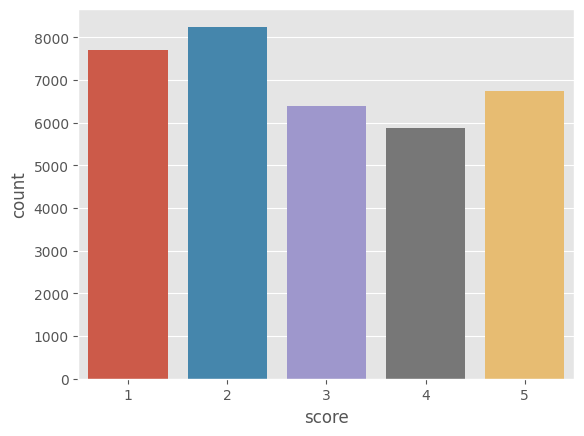

,score,count
0,1,7713
1,2,8250
2,3,6390
3,4,5877
4,5,6733


In [ ]:
# Getting the total count of all the different rating available in the sheet

plt.style.use('ggplot')
rf = scores_united_df[['score']].groupby('score').value_counts()
gen_score_df = pd.DataFrame(rf).reset_index().rename(columns={0:'count'})
# gen_score_df
sns.barplot(data=gen_score_df, x='score', y= 'count')
plt.show()
gen_score_df

# Inference 1 #

A score of 2 has been used most of the time. This is matter of concern as high customer satisfaction is expected.

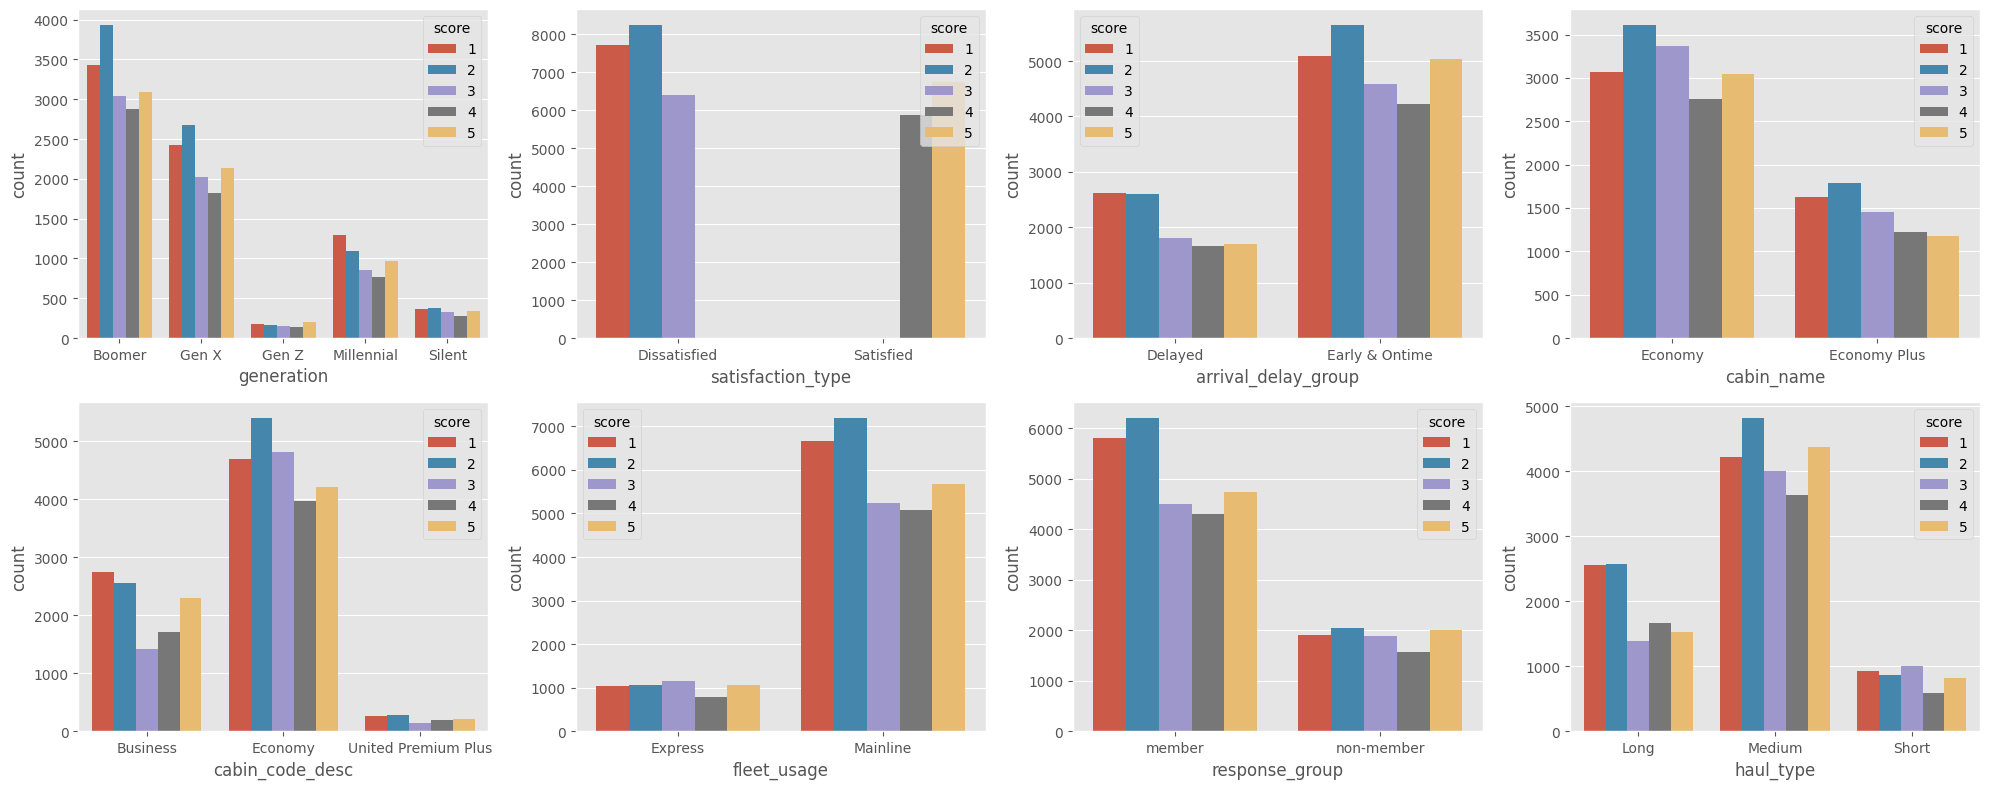

In [ ]:
# Plotting different categorical values with score to get an understanding of if there is any pattern in score and the features.
# Dropping these two value since they are small in number and does not affect the overall analysis
values_to_drop = ['NBK', 'Greatest']
scores_united_df = scores_united_df[~scores_united_df['generation'].isin(values_to_drop)]

categorical_feature = ['generation', 'satisfaction_type','arrival_delay_group','cabin_name','cabin_code_desc', 'fleet_usage','response_group','haul_type','international_domestic_indicator']
plt.figure(figsize = (20, 8))
for i in range(0, len(categorical_feature)-1):
    plt.subplot(2,4,i+1)
    rf = scores_united_df[['score',categorical_feature[i]]].groupby(categorical_feature[i]).value_counts()
    gen_score_df = pd.DataFrame(rf).reset_index().rename(columns={0:'count'})
    # gen_score_df
    sns.barplot(data=gen_score_df, x=categorical_feature[i], y= 'count', hue='score')
    # plt.ylim(0,200)
    # plt.xticks(rotation= 90, ha='right')
    i+=1
    plt.tight_layout()

plt.show()


# Inference 2 #

The above graphs shows the score variation



*   1st grapf shows that Boommer category has participated extensively in giving scores. Although a rating of 2 is prefered by them.

*   5th graph: THis shows that business class people are also not very satisfies. Assuming business class people get more good facility than other class people, this is surprinsing. Score 1 has been given by most of them.

In [ ]:
# Converting datetime into proper format to do time series analysis
scores_united_df['scheduled_departure_date']= pd.to_datetime(scores_united_df['scheduled_departure_date'],format='%d-%m-%Y')

In [ ]:
# Making seperate dataframe for different scoring for plotting a line chart
d1 = scores_united_df[scores_united_df["score"] == 1]
d2 = scores_united_df[scores_united_df["score"] == 2]
d3 = scores_united_df[scores_united_df["score"] == 3]
d4 = scores_united_df[scores_united_df["score"] == 4]
d5 = scores_united_df[scores_united_df["score"] == 5]

col = 'scheduled_departure_date'
vc1 = (d1[[col, 'score']].groupby(col).value_counts().reset_index().rename(columns={0: 'count'}))
vc2 = (d2[[col, 'score']].groupby(col).value_counts().reset_index().rename(columns={0: 'count'}))
vc3 = (d3[[col, 'score']].groupby(col).value_counts().reset_index().rename(columns={0: 'count'}))
vc4 = (d4[[col, 'score']].groupby(col).value_counts().reset_index().rename(columns={0: 'count'}))
vc5 = (d5[[col, 'score']].groupby(col).value_counts().reset_index().rename(columns={0: 'count'}))

trace1 = go.Scatter(x=vc1[col], y=vc1["count"], name="1", marker=dict(color="#bf1a1a"))
trace2 = go.Scatter(x=vc2[col], y=vc2["count"], name="2", marker=dict(color="#4a946c"))
trace3 = go.Scatter(x=vc3[col], y=vc3["count"], name="3", marker=dict(color="#f1c232"))
trace4 = go.Scatter(x=vc4[col], y=vc4["count"], name="4", marker=dict(color="#e10092"))
trace5 = go.Scatter(x=vc5[col], y=vc5["count"], name="5", marker=dict(color="#220145"))

data1 = [trace1, trace2, trace3]
data2 = [trace4, trace5]

layout1 = go.Layout(title="Variation of low satisfaction score with date",xaxis=dict(title="Dates"), yaxis=dict(title="Count of scores"), legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data1, layout=layout1)
fig.show()



# Inference 3 #


*   The line graph sows the variation of different scores over the period of one month. At the end of the month the count of respective scores decreases.



In [ ]:
# Making iffrnt plot to s trn in high satisfi customrs
layout2 = go.Layout(title="Variation of high satisfaction score with date", xaxis=dict(title="Dates"), yaxis=dict(title="Count of scores"), legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data2, layout=layout2)
fig.show()

In [ ]:
#Comnining pre_order df and scores_united_df. This will help us  to undesrtand how food types are getting scored.
combined_df = scores_united_df.merge(pre_order_df, on='record_locator', how='inner')

In [ ]:
print(combined_df.shape)
combined_df.info()

In [ ]:
#  Checking missing value
missing_cabin_name_percentage = (combined_df.cabin_name.isna().value_counts()[1]/combined_df.shape[0])*100
missing_entity_percentage = (combined_df.entity.isna().value_counts()[1]/combined_df.shape[0])*100
missing_loyalty_program_level_percentage = (combined_df.loyalty_program_level.isna().value_counts()[1]/combined_df.shape[0])*100
missing_media_provider_percentage = (combined_df.media_provider.isna().value_counts()[1]/combined_df.shape[0])*100
missing_meal_group_percentage = (combined_df.meal_group.isna().value_counts()[1]/combined_df.shape[0])*100
missing_meal_group_percentage = (combined_df.meal_group.isna().value_counts()[1]/combined_df.shape[0])*100

In [ ]:
print(missing_cabin_name_percentage )
print(missing_entity_percentage )
print(missing_loyalty_program_level_percentage)
print(missing_media_provider_percentage)
print(missing_meal_group_percentage) #same as meal category

49.2464599553795
0.009106224104175203
21.772981833082913
3.555980512680417
9.251923689842007


In [ ]:
# After analyzing the missing values we can drop missing media_provide, entity
combined_df = combined_df.dropna(subset=['entity','media_provider'])

In [ ]:
combined_df.isna().sum()

flight_number_x                         0
origin_station_code                     0
destination_station_code                0
record_locator                          0
scheduled_departure_date                0
question_text                           0
score                                   0
satisfaction_type                       0
driver_sub_group1                       0
driver_sub_group2                       0
arrival_delay_minutes                   0
arrival_delay_group                     0
cabin_code_desc                         0
cabin_name                          10816
entity                                  2
number_of_legs                          0
seat_factor_band                        0
loyalty_program_level                4782
generation                              0
fleet_type_description                  0
fleet_usage                             0
equipment_type_code                     0
ua_uax                                  0
actual_flown_miles                

In [ ]:
# Creatind dataframe to analysize type of food and its scoring
rf = pd.DataFrame(combined_df[['score','meal_group']].value_counts().reset_index().rename(columns= {0:'count'}))

# Creating a stacked column chart using Plotly
fig = go.Figure()

unique_scores = sorted(combined_df['score'].unique())

for score in unique_scores:
    subset = rf[rf['score'] == score]
    fig.add_trace(go.Bar(x=subset['meal_group'], y=subset['count'], name=f'Score {score}'))

fig.update_layout(title='rating-meal_group',
                  xaxis_title='Meal Group',
                  yaxis_title='Count of score',
                  barmode='stack')
fig.show()

# Inference #

Above grapf shows the distribution of scoring according to meal group.

Everest HOT, comes out to be very popular aslarge number of scoring are there which mean it is prefered by most people. But here again a score of 2 has been given maximum times (3584)

United Carterer owned 88-37 scomes the second.

In [ ]:
# analysing meal group score and meal category
rf = pd.DataFrame(combined_df[['score','meal_group','meal_category']].value_counts().reset_index().rename(columns= {0:'count'}))

# Creating a stacked column chart using Plotly
fig = go.Figure()

unique_scores = sorted(combined_df['score'].unique())

for score in unique_scores:
    subset = rf[rf['score'] == score]
    fig.add_trace(go.Bar(x=subset['meal_group'] + ' - ' + subset['meal_category'], y=subset['count'], name=f'Score {score}'))

fig.update_layout(title='score - meal_group - meal_category',
                  xaxis_title='Meal Group - Meal Category',
                  yaxis_title='Count of score',
                  barmode='stack')
fig.show()

# Inference #

Entrence Hot- Breakfast is mostly ordered. This has a scoring of 5 = 1258, this implies it most people are satisfied with this product.

There is significant drop in the use pf product such as Beer Entress cold - cheese etc.

In [ ]:
# Analysing haul type , score and meal group
rf = pd.DataFrame(combined_df[['score','meal_group','meal_category','haul_type']].value_counts().reset_index().rename(columns= {0:'count'}))

# Creating a stacked column chart using Plotly
fig = go.Figure()

unique_scores = sorted(combined_df['score'].unique())

for score in unique_scores:
    subset = rf[rf['score'] == score]
    fig.add_trace(go.Bar(x=subset['haul_type'] + ' - ' + subset['meal_category'], y=subset['count'], name=f'Score {score}'))

fig.update_layout(title='Stacked Column Chart showing rating ',
                  xaxis_title='Meal Group',
                  yaxis_title='Count of score',
                  barmode='stack')
fig.show()

# Inference
Most of the scorig data is related to Medium and long haul type, Again medium break fast has been rated 5 bby most of the prople.


In [ ]:
# Analysing generation and meal group
rf = pd.DataFrame(combined_df[['score','meal_category','generation']].value_counts().reset_index().rename(columns= {0:'count'}))

# Creating a stacked column chart using Plotly
fig = go.Figure()

unique_scores = sorted(combined_df['score'].unique())

for score in unique_scores:
    subset = rf[rf['score'] == score]
    fig.add_trace(go.Bar(x=subset['generation'] + ' - ' + subset['meal_category'], y=subset['count'], name=f'Score {score}'))

fig.update_layout(title='Stacked Column Chart showing rating ',
                  xaxis_title='Meal Group',
                  yaxis_title='Count of score',
                  barmode='stack')
fig.show()

# Inference

Again, according to above chart, Boomers are in large number. Here also breakfast is doing well